# Operating Expenses

The Single Territorial Form (FUT) reduce the number of basic official data reports to be submitted to the National Government, the Departments, Districts and Municipalities, their public establishments, the Territories and certified Indigenous Reservations and/or Associations of the latter, referred to in Decree 1953 of 2014 or the rule that amends, adds or replaces it. Likewise, the FUT shall promote the simplification and improvement of the quality of such reports to be informed. In this regard, no entity of the National Government may, on its own account, request from the entities obliged to report to the FUT the information that they are already reporting through it.

One of the most important FUT categories is operating expenses.

**Entity:** Contaduría General de la Nación

**Description:** Historical information (2012-2021) of the operating expenses of the country's
municipalities.

**Variables**

1. FUT code - int -
2. Entity name - string - name of the territorial entity
3. DANE department code - int - code that assigns the DANE to each department
4. Name DANE department - string - department name
5. DANE code municipality - int - code that assigns the DANE to each municipality
6. Name DANE municipality - string - name of the municipality
7. Concept Code - string - code that is assigned to each concept
8. Concept - string - name of each income received by the territorial entity
9. Executing Unit Code - int -
10. Executing Unit - string -
11. Initial Budget - float - initial budget projected by the territorial entity for each concept
12. Final Budget - float - budget at the end of the year
13. Commitments - float - total revenue collected
14. Obligations - float - total value of the commitments contracted into by the territorial entity
15. Payments - float - total value intended to pay the obligations

For more information click [here](https://www.chip.gov.co/schip_rt/paginiciofut.htm).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Overview

The data is separated into different csv's by year from 2012 to 2021, so it is necessary to merge them in order to process and clean them all together at the same time.

In [2]:
%%capture 
## Add the capture line to eliminate warning messages
## A list containing the years 2012 to 2021 is created.
years = list(range(2013, 2022))

## Start by loading the dataset of operating cats for the year 2012.
df = pd.read_csv('FUT_GASTOS_FUNCIONAMIENTO_2012.csv', sep = ";",error_bad_lines=False, encoding = 'utf-8')

## A special column is created to contain the year to which each DataSet belongs.
df['Año'] = 2012

## To concatenate the data, an auxiliary dataframe will be created and updated with the data for each year.
## to be appended to the initial DataFrame.
for year in years:
    aux_df =  pd.read_csv('FUT_GASTOS_FUNCIONAMIENTO_'+ str(year) +'.csv', sep = ";",error_bad_lines=False, encoding = 'utf-8')
    aux_df['Año'] = year
    df = pd.concat([df, aux_df], axis = 0)

## Reset the index to remove the levels generated by the concatenation.
df.reset_index(drop=True, inplace=True)

We found that the complete DataSet of running cats contains almost 2 million individuals and 18 variables.

In [3]:
df.shape

(1927006, 18)

Whose first 5 individuals look as follows.

In [4]:
df.head()

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,Código Fuente Financiación,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año
0,115050000,DEPARTAMENTO DEL META,50,META,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,12.808.880,12.889.311,12.668.113,12.668.113,12.654.124,2012
1,117373000,DEPARTAMENTO DEL TOLIMA,73,TOLIMA,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,8.632.800,8.098.443,7.954.339,7.929.967,7.924.443,2012
2,118181000,DEPARTAMENTO DEL ARAUCA,81,ARAUCA,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,5.607.508,5.065.710,5.034.157,5.034.157,5.010.440,2012
3,118888000,"DEPARTAMENTO DEL ARCHIPIÉLAGO DE SAN ANDRÉS, P...",88,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,11.326.872,10.692.072,9.929.404,9.929.404,9.929.404,2012
4,110505000,DEPARTAMENTO DE ANTIOQUIA,5,ANTIOQUIA,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,61.771.292,62.918.327,56.040.454,56.040.454,56.015.936,2012


As can be seen below, the size of the data reported each year has been increasing since 2012, so it is to be expected that the total cats for the last few years will be comparatively much larger than the first year if inflation is not taken into account. On the other hand, 2021 is the year with the lowest number of rows since these have not yet been reported.

In [5]:
df['Año'].value_counts()

2020    215793
2018    214533
2017    214368
2019    213704
2016    211191
2014    207202
2015    206727
2013    204028
2012    196449
2021     43011
Name: Año, dtype: int64

## 2. Data Cleaning

### 2.1. Identifying unique concepts

The dataset inforamtion shows that does not have financial columns determined as numerical, therefore, among the steps to be performed will be the transformation of these columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927006 entries, 0 to 1927005
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Código FUT                  int64  
 1   Nombre Entidad              object 
 2   Cód. DANE Departamento      int64  
 3   Nombre DANE Departamento    object 
 4   Cód. DANE Municipio         float64
 5   Nombre DANE Municipio       object 
 6   Código Concepto             object 
 7   Concepto                    object 
 8   Código Unidad Ejecutora     float64
 9   Unidad Ejecutora            object 
 10  Código Fuente Financiación  float64
 11  Fuente Financiación         object 
 12  Presupuesto Inicial         object 
 13  Presupuesto Definitivo      object 
 14  Compromisos                 object 
 15  Obligaciones                object 
 16  Pagos                       object 
 17  Año                         int64  
dtypes: float64(3), int64(3), object(12)
memory usage: 264.6+ MB


This dataset has different categories and subcategories, within which the categories with a lower level totalized the expenses and the budget of the categories of a higher level, as it can be seen there are 341 categories, Where the level of each category is given by the length of its chain, so category 1.2 is level 3 and totals the expenses and budget of categories 1.2.1, 1.2.2 which belong to the level 5 and other categories for example a level 7  1.2.2.1 category and so on.

In [7]:
len(df['Código Concepto'].unique())

341

On the other hand, we have the columns that refer to territorial entities, concepts and executing units, the values in these columns must be standardized in such a way that, for example, the two or more ways of writing a department become a single form, accents and spaces must be eliminated.

In [8]:
columns_to_format = ['Nombre Entidad', 'Nombre DANE Departamento', 'Nombre DANE Municipio', 'Código Concepto', 'Concepto', 'Unidad Ejecutora']

As mentioned before, we will first remove the accents, the space at the begining and the end of ech string, and points by commas

In [9]:
a,b = 'áéíóúüñÁÉÍÓÚÜ','aeiouunAEIOUU'
trans = str.maketrans(a,b)
for column in columns_to_format:
    df[column] = df[column].str.strip()
    df[column] = df[column].str.translate(trans)
    df[column] = df[column].replace(r'\.',',', regex=True)

As can be seen for example the number of unique `Código Concepto` were recuded to only 187 categories.

In [10]:
len(df['Código Concepto'].unique())

187

A special column is created to identify the length of the concept and all the sub concepts whose length in the code is greater than 5 are eliminated, this is done to avoid that the sub concepts are added again and alter the totalized results, in the same way it was decided to restrict the level of the analysis only up to 3 levels, therefore, the overall calculation of the expenses will not be affected if we remove those higher categories, in contrast, this filtering will help us to facilitate the analysis.


In [11]:
df['Nivel categoria'] = df['Código Concepto'].str.len()
df = df[df['Nivel categoria'] <= 5]

In [12]:
len(df['Código Concepto'].unique())

34

In [13]:
df['Código Concepto'].unique()

array(['1,1,1', '1,1,3', '1,1,4', '1,1', '1,2,1', '1,2,2', '1,2', '1,3,4',
       '1,3', '1,3,6', '1,3,8', '1,4', '1,9,2', '1,9', '1', '1,9,1',
       '1,1,2', '1,10', '1,2,9', '1,2,4', '1,3,1', '1,3,2', '1,3,3',
       '1,3,5', '1,3,9', '1,4,1', '1,4,2', '1,4,3', '1,8', 'VAL', '1,9,4',
       '1,9,3', '1,3,7', '1,1,5'], dtype=object)

### 2.2 Identifying other atypical formats

Below is a quick preview of the different categories in each of the previously mentioned columns.

In [14]:
for column in columns_to_format:
    print(column + '-------------------------------')
    print(df[column].unique())

Nombre Entidad-------------------------------
['DEPARTAMENTO DEL META' 'DEPARTAMENTO DEL TOLIMA'
 'DEPARTAMENTO DEL ARAUCA' ... 'HATONUEVO' 'PUERTO RICO' 'YONDO']
Nombre DANE Departamento-------------------------------
['META' 'TOLIMA' 'ARAUCA'
 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA' 'ANTIOQUIA'
 'VICHADA' 'ATLANTICO' 'BOYACA' 'CAQUETA' 'CUNDINAMARCA' 'CESAR' 'CHOCO'
 'MAGDALENA' 'NARIÑO' 'NORTE DE SANTANDER' 'SANTANDER' 'VALLE DEL CAUCA'
 'PUTUMAYO' 'CASANARE' 'SUCRE' 'LA GUAJIRA' 'QUINDIO' 'AMAZONAS' 'GUAINIA'
 'CORDOBA' 'VAUPES' 'BOLIVAR' 'CALDAS' 'CAUCA' 'HUILA' 'GUAVIARE'
 'RISARALDA' 'BOGOTA, D,C,']
Nombre DANE Municipio-------------------------------
[nan 'BETEITIVA' 'SANTA MARIA' ... 'SAN JOSE DE CUCUTA'
 'SAN JOSE DE TOLUVIEJO' 'MANAURE BALCON DEL CESAR']
Código Concepto-------------------------------
['1,1,1' '1,1,3' '1,1,4' '1,1' '1,2,1' '1,2,2' '1,2' '1,3,4' '1,3' '1,3,6'
 '1,3,8' '1,4' '1,9,2' '1,9' '1' '1,9,1' '1,1,2' '1,10' '1,2,9' '1,2,4'
 '1,3,1' '1

On the other hand, the **Guican** minicipio was incorrectly saved in the dataset and must be cleaned up.

In [15]:
df['Nombre DANE Municipio'] = df['Nombre DANE Municipio'].replace('GÃœICAN', 'GUICAN')

### 2.3. Cleaning NaN and blank values

As part of the previous results, it is evident that the variable `Executing Unit` had a large number of blank data, so it will be replaced by NaN values.

In [16]:
df['Unidad Ejecutora'] = df['Unidad Ejecutora'].replace('', np.NaN)

In [17]:
df[df['Unidad Ejecutora'] == ''].count().sum()

0

Then we will identify the columns with missing data.

In [18]:
df.isna().sum()

Código FUT                         0
Nombre Entidad                     0
Cód. DANE Departamento             0
Nombre DANE Departamento           0
Cód. DANE Municipio            17886
Nombre DANE Municipio          17886
Código Concepto                    0
Concepto                           0
Código Unidad Ejecutora         7286
Unidad Ejecutora                6742
Código Fuente Financiación    302458
Fuente Financiación           295172
Presupuesto Inicial                0
Presupuesto Definitivo             0
Compromisos                        0
Obligaciones                       0
Pagos                              0
Año                                0
Nivel categoria                    0
dtype: int64

With a total of missing data in the dataset of:

In [19]:
df.isna().sum().sum()

647430

In [20]:
df.shape

(400905, 19)

Since we are only interested in the columns that have a mini-municipality and based in the meeting conclusion elaborated with **Asocapitales** it is possible to eliminate the rows that do not have `Cód. DANE Municipio` or `Nombre DANE Municipio`, this is because the places given by these rows are mostly departmental data.

In [21]:
df.dropna(subset = ['Cód. DANE Municipio','Nombre DANE Municipio'], inplace = True)

In [22]:
df.shape

(383019, 19)

The next step is to fill in the missing values in the following columns `Código Unidad Ejecutora`,   `Código Fuente Financiación`, `Fuente Financiación`, `Unidad Ejecutora`, since these represent mostly categories we will simply add the category **otros** for fill each of the **NaN** values from these columns.

In [23]:
df.fillna('otros', inplace = True)

In [24]:
df.shape

(383019, 19)

### 2.4. Formating finantial Columns

The `Presupuesto Inicial`,`Presupuesto Definitivo`, `Compromisos`, `Obligaciones`, `Pagos` variables belong to all the columns that refer to financial values, i.e. the amounts of money that each municipality reported for these subjects.

In [28]:
financial_columns = ['Presupuesto Inicial','Presupuesto Definitivo', 'Compromisos', 'Obligaciones', 'Pagos']

In [29]:
df[financial_columns]

,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos
4131,10.772,14.541,14.382,14.382,14.382
4132,28.410,28.576,25.865,25.865,25.865
4133,12.135,12.134,11.385,11.385,11.385
4134,40.650,40.650,33.327,33.327,33.327
4135,215.659,209.547,196.295,196.295,196.295
...,...,...,...,...,...
1927001,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0
1927002,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0
1927003,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0
1927004,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0


These variables are in string format, so it is first necessary to remove the period from each string and then transform it to a numerical data.

In [30]:
df[financial_columns] = df[financial_columns].replace(r'\.','', regex=True).astype('int64')

On the other hand, the financial records prior to 2017 are in thousands, so it is necessary to add 3 zeros to these data to adjust them to the later years, which are in pesos.

In [32]:
df.loc[df['Año'] < 2017, financial_columns] = df[financial_columns]*1000

In [33]:
df[financial_columns]

,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos
4131,10772000,14541000,14382000,14382000,14382000
4132,28410000,28576000,25865000,25865000,25865000
4133,12135000,12134000,11385000,11385000,11385000
4134,40650000,40650000,33327000,33327000,33327000
4135,215659000,209547000,196295000,196295000,196295000
...,...,...,...,...,...
1927001,1004894870,1004894870,1004894870,1004894870,1004894870
1927002,1004894870,1004894870,1004894870,1004894870,1004894870
1927003,1004894870,1004894870,1004894870,1004894870,1004894870
1927004,1004894870,1004894870,1004894870,1004894870,1004894870


### 2.5. Concepts cleaning

Since the two most repeated concepts are totals of the cats generated by each municipality, to facilitate the analysis, a new dataset will be created `df1` that only has the totals and another one that has the information of **single concepts**  that involve operational cats. 

In [34]:
## Dataset of total expenses
df1 = df[(df['Concepto'] == 'CIFRAS DE CONTROL PARA LOS GASTOS DE FUNCIONAMIENTO') | \
       (df['Concepto'] == 'TOTAL GASTOS DE FUNCIONAMIENTO')]

In [35]:
df1.head()

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,Código Fuente Financiación,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria
4940,210105101,CIUDAD BOLIVAR,5,ANTIOQUIA,5101.0,CIUDAD BOLIVAR,1,TOTAL GASTOS DE FUNCIONAMIENTO,7.0,SECRETARIA DE SALUD,otros,otros,98316000,89742000,82039000,82039000,71875000,2012,1
4941,210173001,IBAGUE,73,TOLIMA,73001.0,IBAGUE,1,TOTAL GASTOS DE FUNCIONAMIENTO,7.0,SECRETARIA DE SALUD,otros,otros,1223922000,1223922000,1223922000,1223922000,1223922000,2012,1
4942,210168001,BUCARAMANGA,68,SANTANDER,68001.0,BUCARAMANGA,1,TOTAL GASTOS DE FUNCIONAMIENTO,7.0,SECRETARIA DE SALUD,otros,otros,1303141000,1303141000,1303141000,1303141000,1303141000,2012,1
4943,210170001,SINCELEJO,70,SUCRE,70001.0,SINCELEJO,1,TOTAL GASTOS DE FUNCIONAMIENTO,7.0,SECRETARIA DE SALUD,otros,otros,218073000,318720000,317130000,317130000,241072000,2012,1
4944,210068500,OIBA,68,SANTANDER,68500.0,OIBA,1,TOTAL GASTOS DE FUNCIONAMIENTO,7.0,SECRETARIA DE SALUD,otros,otros,47567000,47567000,44262000,44262000,43722000,2012,1


In [36]:
df1['Concepto'].value_counts()

CIFRAS DE CONTROL PARA LOS GASTOS DE FUNCIONAMIENTO    41928
TOTAL GASTOS DE FUNCIONAMIENTO                         35693
Name: Concepto, dtype: int64

In [37]:
## Dataset of single concepts

df = df[(df['Concepto'] != 'CIFRAS DE CONTROL PARA LOS GASTOS DE FUNCIONAMIENTO') & \
       (df['Concepto'] != 'TOTAL GASTOS DE FUNCIONAMIENTO')]

In [38]:
df['Concepto'].value_counts().to_frame().head()

,Concepto
GASTOS DE PERSONAL,35564
SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,34184
GASTOS GENERALES,33208
CONTRIBUCIONES INHERENTES A LA NOMINA,32501
ADQUISICION DE SERVICIOS,31019


Given that the 2021 data are clearly outliers, they are eliminated.

In [39]:
df = df[df['Año'] != 2021]

## 3. Data understanding

We must understand a little more about what the financial columns refer to, these are defined as:

**1. Presupuesto inicial:** includes the total estimate of modifications, reductions, deferrals, additions, transfers) of the budget.

**2. Presupuesto Definitivo:** orresponds to the final appropriation, i.e. that which incorporates the modifications, reductions, deferrals, additions, transfers) of the budget.

**3. Compromisos:** Corresponds to the totality of the commitments (Budgetary records) that the territorial entity acquired with the purpose of developing the functions proper to the operation.

**4. Obligaciones:** These are the records of accrued obligations arising from agreed advances or contracts or from goods and services received in satisfaction or due to a labor relationship, as part of normal operations.

**5. Pagos:** This is the record of accrued payments made on agreed advances and on goods and services received in satisfaction or through a labor relationship acquired as part of operating expenses.

The first thing that can be seen from the financial data is that the difference between these columns is small, this is due to the fact that the budgets are estimated in order to meet commitments, obligations and therefore payments.

In [ ]:
df2 = df[df['Nivel categoria'] == 3]
df3 = df[df['Nivel categoria'] == 5]

In [44]:
df2[financial_columns]

,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos
4939,0,2925000,2925000,2925000,2925000
5132,2050000,8749000,6984000,6984000,5564000
5133,15410000,2503000,2503000,2503000,2503000
5134,0,10000000,6539000,6539000,6389000
5135,0,2651000,2372000,2372000,2372000
...,...,...,...,...,...
1882641,2865252256,3692252256,3687271129,3687271129,3687271129
1882642,1230000,1308000,1307600,1307600,1307600
1882643,6000000,11000000,4910181,4910181,4910181
1882644,522000,632000,632000,632000,632000


From the statistical summaries of the financial columns we can see how all the data are skewed to the right, since the average is much higher than the median. This implies that at least 50% of the estimated budget per municipality per item is less than $97,755,510 million pesos.

In [45]:
df2[financial_columns].describe()

,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos
count,8.546200e+04,8.546200e+04,8.546200e+04,8.546200e+04,8.546200e+04
mean,1.544217e+09,1.639562e+09,1.499707e+09,1.471421e+09,1.421599e+09
std,3.130509e+10,3.415251e+10,3.075578e+10,2.994149e+10,2.910096e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.490000e+07,1.723937e+07,1.471491e+07,1.456225e+07,1.391919e+07
50%,9.775551e+07,1.041828e+08,9.733774e+07,9.692938e+07,9.443459e+07
75%,2.981692e+08,3.553761e+08,3.157203e+08,3.126176e+08,3.010295e+08
max,5.005300e+12,5.818779e+12,5.090394e+12,4.869304e+12,4.675571e+12


In [47]:
df2[financial_columns].describe().loc['mean'] - df2[financial_columns].describe().loc['50%']

Presupuesto Inicial       1.446462e+09
Presupuesto Definitivo    1.535379e+09
Compromisos               1.402369e+09
Obligaciones              1.374491e+09
Pagos                     1.327164e+09
dtype: float64

And as reflected below, any budget in excess of $\$862'581,200$ million pesos will be considered as atypical as well as any financial obligation in excess of $\$759'700,600$ million pesos.

In [48]:
df2[financial_columns].describe().loc['75%'] + (df2[financial_columns].describe().loc['75%'] - df2[financial_columns].describe().loc['25%']) * 1.5

Presupuesto Inicial       7.230731e+08
Presupuesto Definitivo    8.625812e+08
Compromisos               7.672283e+08
Obligaciones              7.597006e+08
Pagos                     7.316951e+08
dtype: float64

In [49]:
df1[financial_columns].describe()

,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos
count,7.762100e+04,7.762100e+04,7.762100e+04,7.762100e+04,7.762100e+04
mean,3.768023e+09,3.982620e+09,3.640881e+09,3.571601e+09,3.452822e+09
std,7.050162e+10,7.509606e+10,6.665538e+10,6.445678e+10,6.253676e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.620000e+07,9.848900e+07,9.485600e+07,9.444900e+07,9.239700e+07
50%,1.379079e+08,1.447470e+08,1.360870e+08,1.355258e+08,1.326026e+08
75%,8.281800e+08,9.311571e+08,8.530400e+08,8.469530e+08,8.196740e+08
max,8.257600e+12,9.264648e+12,7.702655e+12,7.283768e+12,6.919749e+12


In similar way occurs with the `Nivel de concepto 1` budget in excess of $\$1'926.150.000$ million pesos will be considered as atypical as well as any financial obligation in excess of $\$1'975.709.000$ million pesos.

In [50]:
df1[financial_columns].describe().loc['75%'] + (df1[financial_columns].describe().loc['75%'] - df1[financial_columns].describe().loc['25%']) * 1.5

Presupuesto Inicial       1.926150e+09
Presupuesto Definitivo    2.180159e+09
Compromisos               1.990316e+09
Obligaciones              1.975709e+09
Pagos                     1.910590e+09
dtype: float64

It can be quickly seen that the vast majority of the outliers for `Nivel de concepto 1`, are large cities in general of category 1 or Specials

In [51]:
df1[(df1['Presupuesto Inicial'] > 1.926150e+09) & (df1['Año'] == 2020)].\
        sort_values(by = 'Presupuesto Inicial', ascending = False)['Nombre DANE Municipio'].value_counts().to_frame()

,Nombre DANE Municipio
"BOGOTA, D,C,",14
VILLAVICENCIO,12
MANIZALES,12
ITAGUI,12
ENVIGADO,12
...,...
BARRANCA DE UPIA,1
APULO,1
PACHO,1
EL RETORNO,1


## 4. Data Visualisation

### 4.1. Analyzing the concepts that have the greatest impact on the data.
By analyzing which concepts have a greater number of records for the `Nivel concepto = 2`, it can be seen that $40\%$ of the **expeneses concepts** belong to `Gastos de personal` which include all direct or indirect payroll services, on the other hand, a large part of the records are made under the concept of `Gastos generales` with $37\%$, which are mainly for the acquisition of goods and services.

In [55]:
OE_percentajes = df2[['Concepto']].value_counts()/df2.shape[0] *100
OE_percentajes.to_frame()

,0
Concepto,
GASTOS DE PERSONAL,40.350097
GASTOS GENERALES,37.112401
TRANSFERENCIAS CORRIENTES,13.903255
OTROS GASTOS DE FUNCIONAMIENTO,4.275584
PAGO DEFICIT DE FUNCIONAMIENTO,2.953359
"COSTOS Y GASTOS ASOCIADOS A LA OPERACION, PRODUCCION Y COMERCIALIZACION",1.270740
TRANSFERENCIAS DE CAPITAL,0.134563


<AxesSubplot:ylabel='None'>

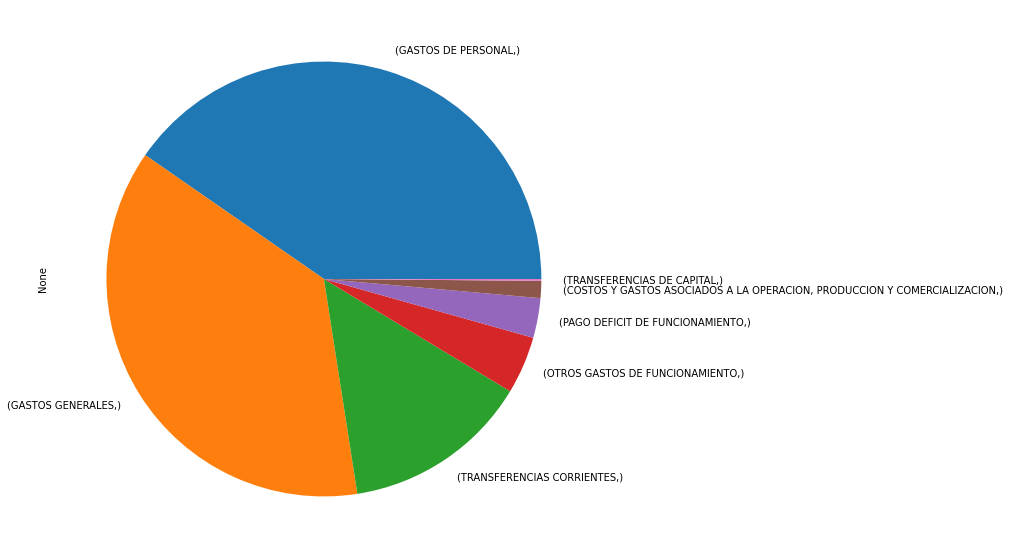

In [56]:
OE_percentajes.plot.pie(y = 'Código Concepto', figsize=(20, 10))

### 4.2 Analyzing The level of expenses by Unidad Ejecutora
On the other hand, again analyzing the `Level concept = 2`, it can be seen that most of the expenses are executed by the **adminsitracion central**, being about 13 times higher than the other **executing units**, these other units have very similar levels of expenses, being the **secretaria de salud** unit that has less financial obligations.

Text(0, 0.5, 'Obligations')

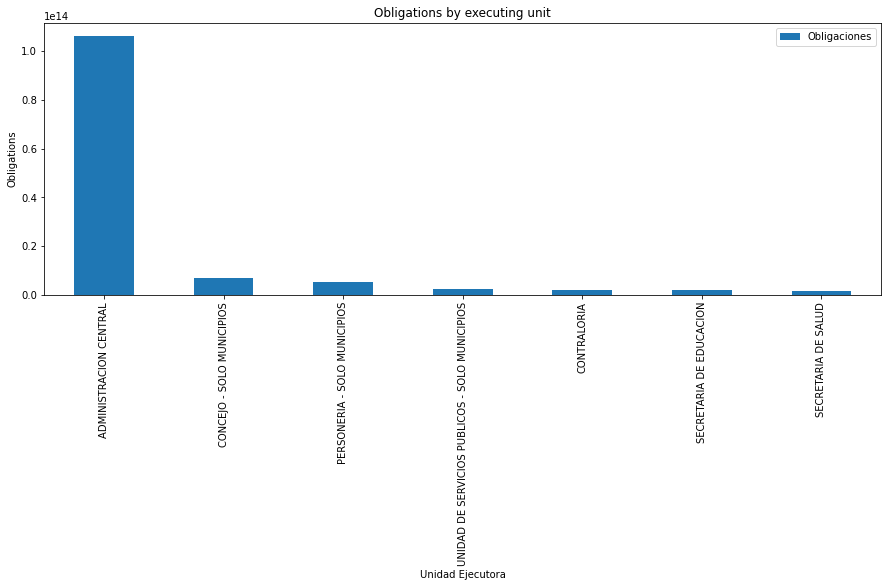

In [57]:
df2.groupby(['Unidad Ejecutora'])['Obligaciones'].sum().to_frame().sort_values(by = 'Obligaciones', ascending = False).plot.bar(figsize =(15,5))
plt.title('Obligations by executing unit')
plt.ylabel('Obligations')

### 4.3 Analyzing the level of expenses by Departamento

If we make the calculations at the departmental level we can see that if we take the municipality of **Bogotá** as a departamento, this city is the one that presents the highest expenses, even higher than entire departamentos, in this way, the expenses of bogota are almost 2 times higher than **Antioquia** the departamento with the highest expenses and almost 5 times higher than **Cundimarca**, department where this city is located.


Text(0.5, 0, 'Deparment')

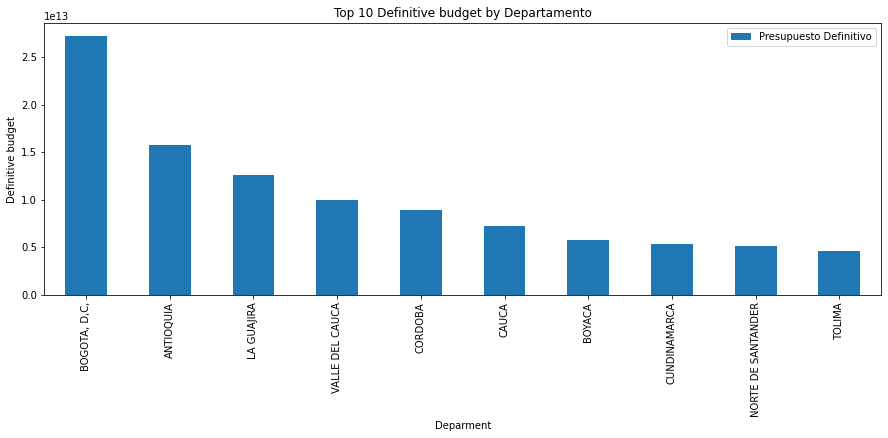

In [58]:
df2.groupby(['Nombre DANE Departamento'])['Presupuesto Definitivo'].sum().to_frame().sort_values(by = 'Presupuesto Definitivo', ascending = False).head(10).plot.bar(figsize =(15,5))
plt.title('Top 10 Definitive budget by Departamento')
plt.ylabel('Definitive budget')
plt.xlabel('Deparment')

### 4.4 Analyzing the level of expenses by municipality
If we analyze expenditures at the municipal level, we can see that Bogotá considerably exceeds the expenditures of all municipalities, including that of the municipality of Medellin, the most important city in the department of Antiquia, with expenditures almost 5 times higher.

On the other hand, the presence of outliers is evident, such as the municipalities of Maicao, Miranda, San Pelayo, San Vicente and Los Cordobas, all level 6 municipalities that have a smaller budget and therefore should have lower expenditures. Therefore, it is likely that there are errors in the data for these municipalities.


Text(0.5, 0, 'Municipality')

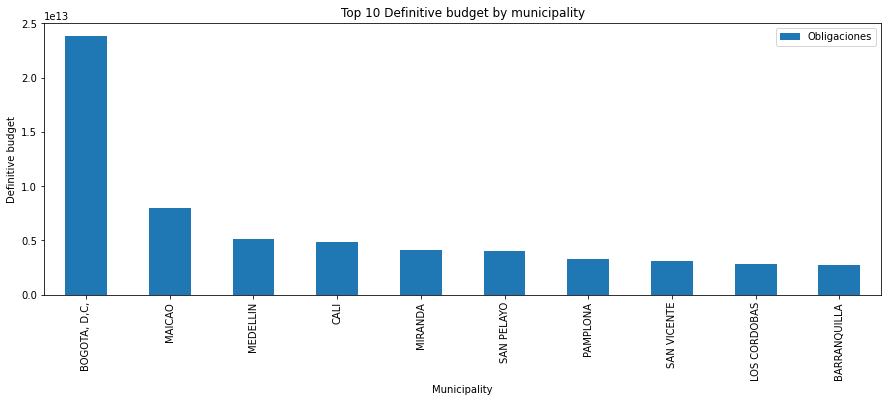

In [59]:
df2.groupby(['Nombre DANE Municipio'])['Obligaciones'].sum().to_frame().sort_values(by = 'Obligaciones', ascending = False).head(10).plot.bar(figsize =(15,5))
plt.title('Top 10 Definitive budget by municipality')
plt.ylabel('Definitive budget')
plt.xlabel('Municipality')

### 4.5 Analyzing the gastos de personal

On other hand, the concepts that generate a greater amount of expenses such as payroll services, we can see that they have a high variability, however, they tend to have a peak after election years such as 2015 and 2018.

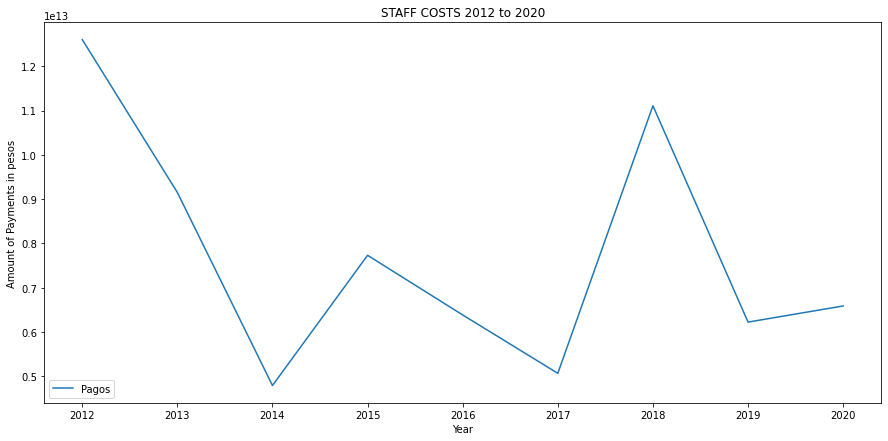

In [60]:
GP = df2[df2['Concepto'] == 'GASTOS DE PERSONAL']
GP.groupby(by = 'Año')['Pagos'].sum().plot(figsize = (15,7))
plt.xlabel('Year')
plt.ylabel('Amount of Payments in pesos')
plt.title('STAFF COSTS 2012 to 2020')
plt.legend(loc='lower left')

### 4.6 Analyzing the gastos de generales
Similar to what happens with gastos de personal, these tend to have a large variance and do not show any trend, however, graphically it can be said that there is some sort of correlation between gastos de personal and the gastos generales, it could be said that if one of these concepts increases, the other will also increase.

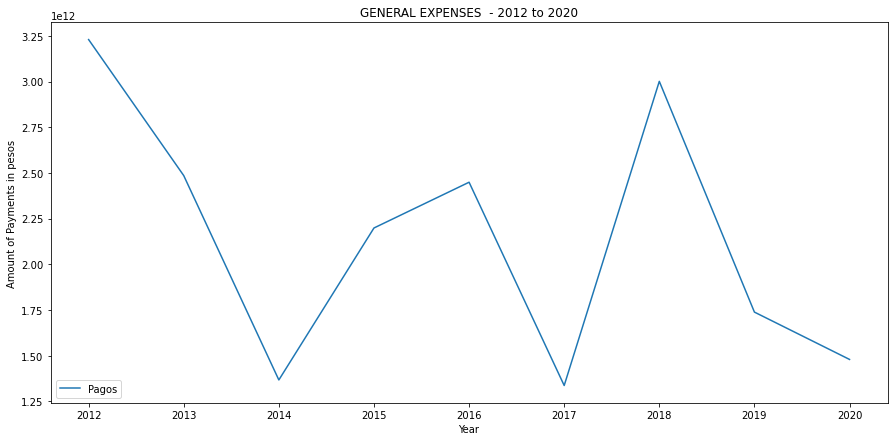

In [61]:
GG = df2[df2['Concepto'] == 'GASTOS GENERALES']
GG.groupby(by = 'Año')['Pagos'].sum().plot(figsize = (15,7))
plt.xlabel('Year')
plt.ylabel('Amount of Payments in pesos')
plt.title('GENERAL EXPENSES  - 2012 to 2020')
plt.legend(loc='lower left')

### 4.7 Analyzing the Transferencias corrientes

Unlike the other 2 concepts, current transfers have a general decreasing trend, with a peak in 2013, probably caused by an outlier.

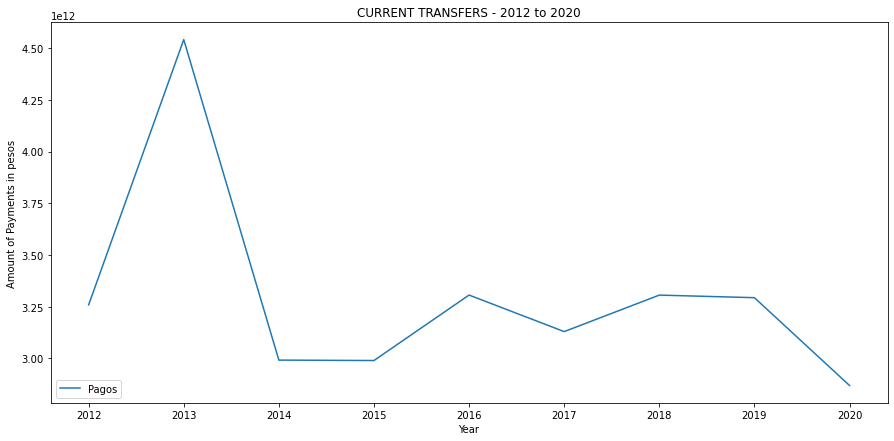

In [62]:
TC = df2[df2['Concepto'] == 'TRANSFERENCIAS CORRIENTES']
TC.groupby(by = 'Año')['Pagos'].sum().plot(figsize = (15,7))
plt.xlabel('Year')
plt.ylabel('Amount of Payments in pesos')
plt.title('CURRENT TRANSFERS - 2012 to 2020')
plt.legend(loc='lower left')